# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
DATA_PATH = "../data"
df_train = pd.read_csv(f"{DATA_PATH}/train_preprocessed.csv")
df_test = pd.read_csv(f"{DATA_PATH}/test.csv")

# Histogram

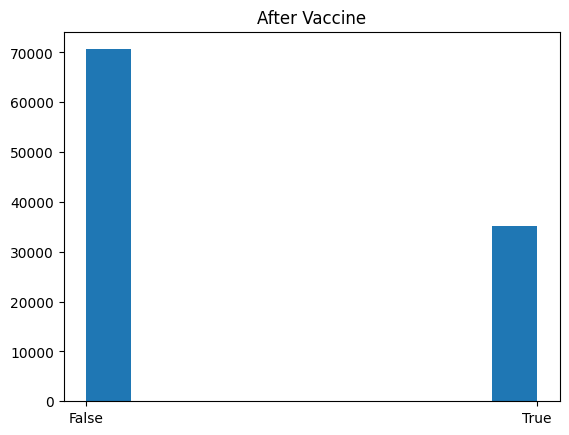

In [3]:
plt.hist(df_train["After Vaccine"].astype(str))
plt.title("After Vaccine")
plt.show()

# Barplot

In [4]:
def create_barplot(y:str, x:str="Year") -> None:
    _, ax = plt.subplots(figsize=(10,4))
    sns.barplot(data=df_train.loc[df_train["Location"]=="World"], x=x, y=y, saturation=1, edgecolor='white')
    sns.despine()
    ax.get_legend()
    plt.title(f"{y} by {x} Worldwise")
    plt.show()

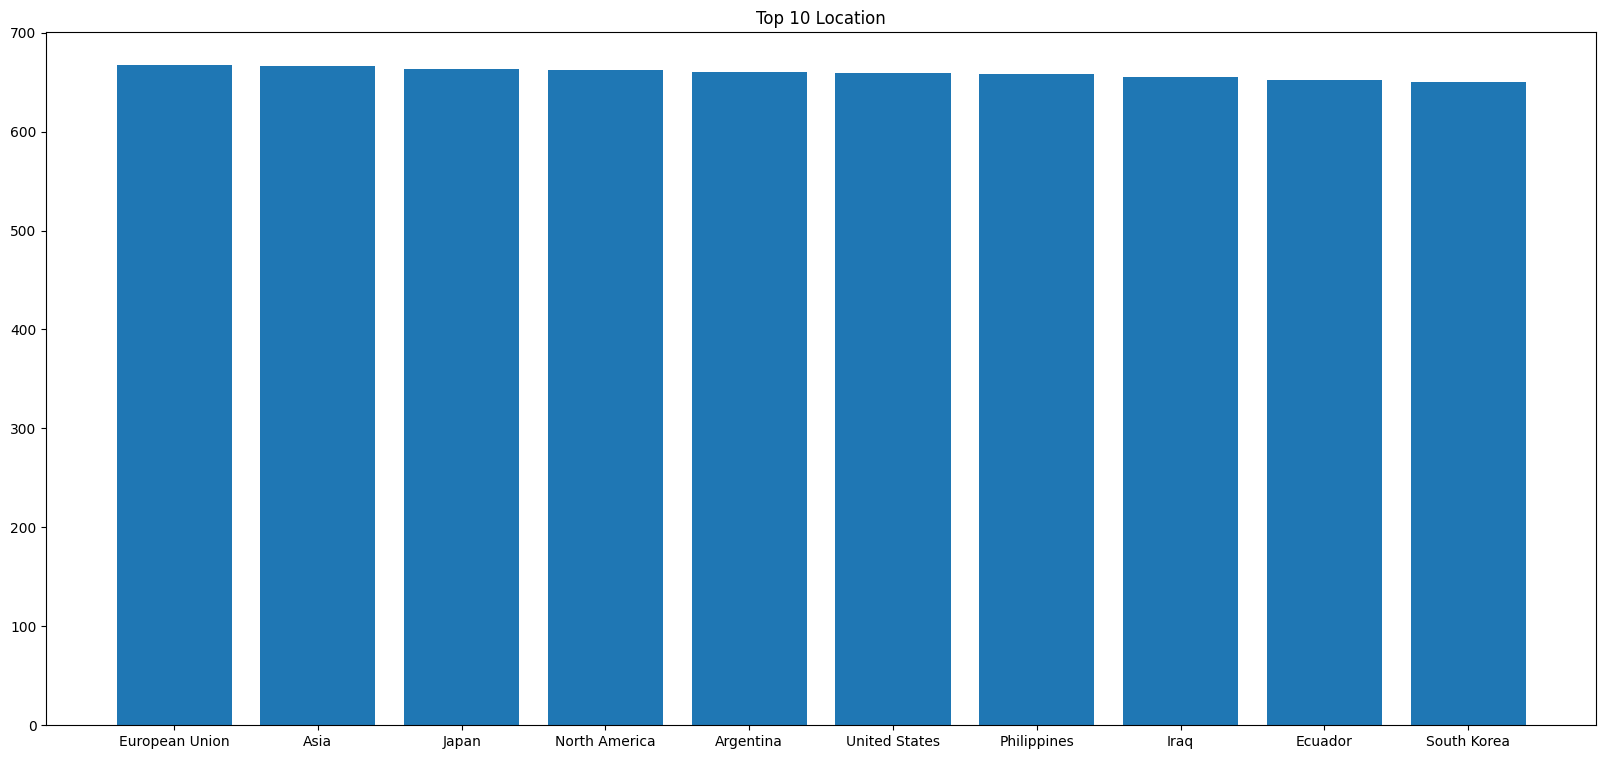

In [5]:
location_counts = list(df_train["Location"].dropna().astype(str).value_counts().to_dict().items())
bin_num = 10
plt.figure(figsize=(20,9))
plt.bar([it[0] for it in location_counts[:bin_num]], [it[1] for it in location_counts[:bin_num]])
plt.title(f"Top {bin_num} Location")
plt.show()

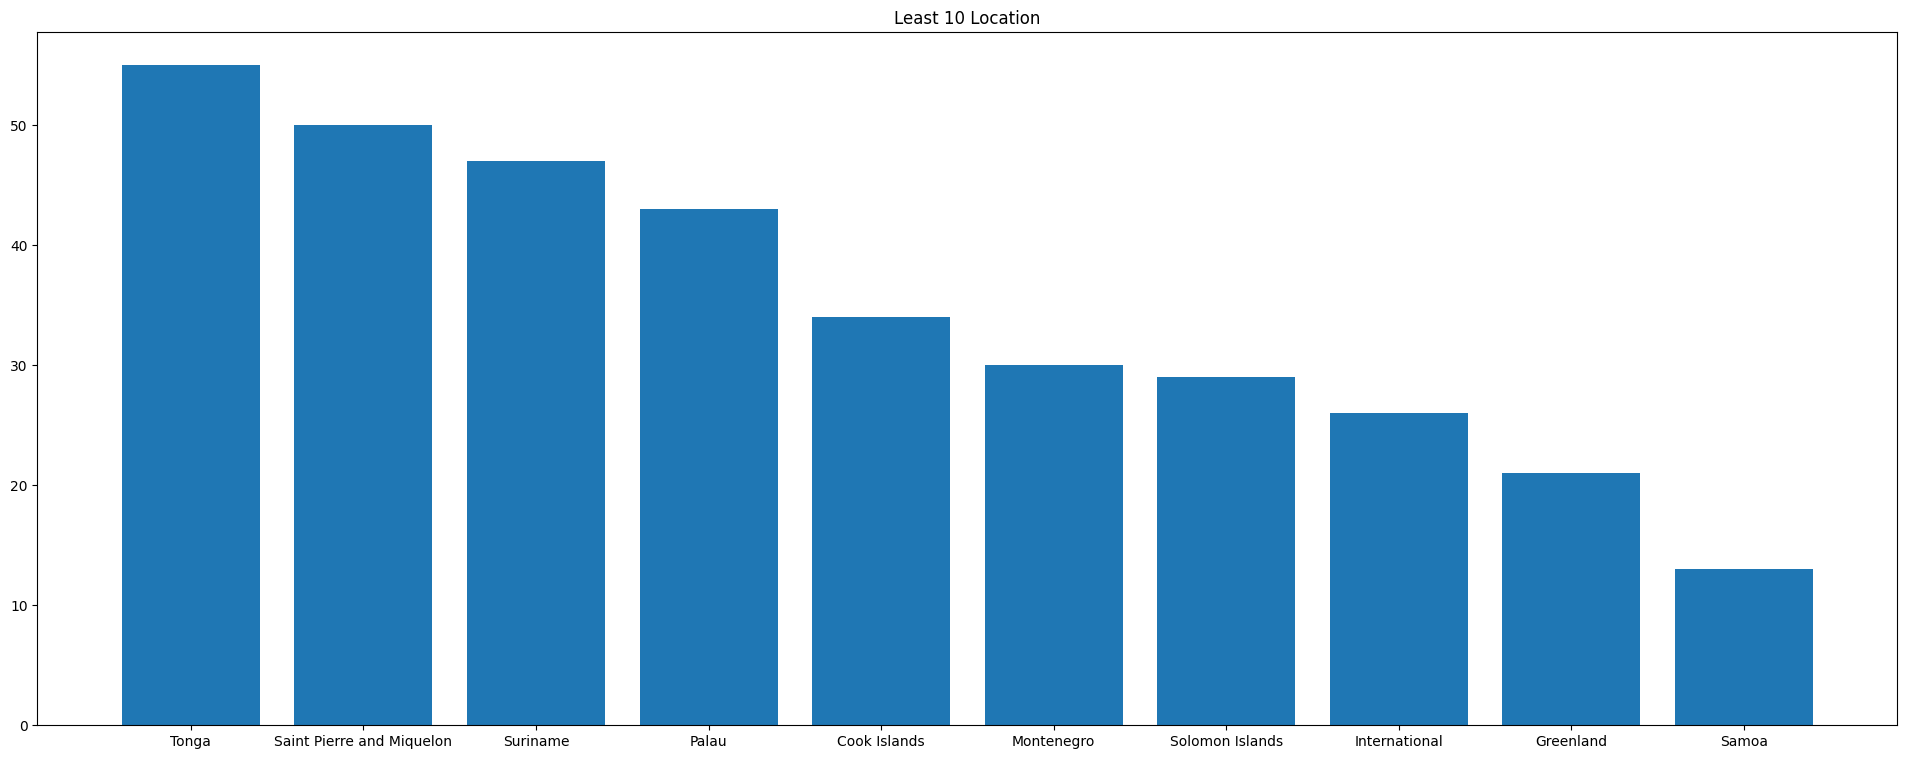

In [6]:
plt.figure(figsize=(24,9))
plt.bar([it[0] for it in location_counts[len(location_counts) - bin_num:]], [it[1] for it in location_counts[len(location_counts) -bin_num : ]])
plt.title(f"Least {bin_num} Location")
plt.show()

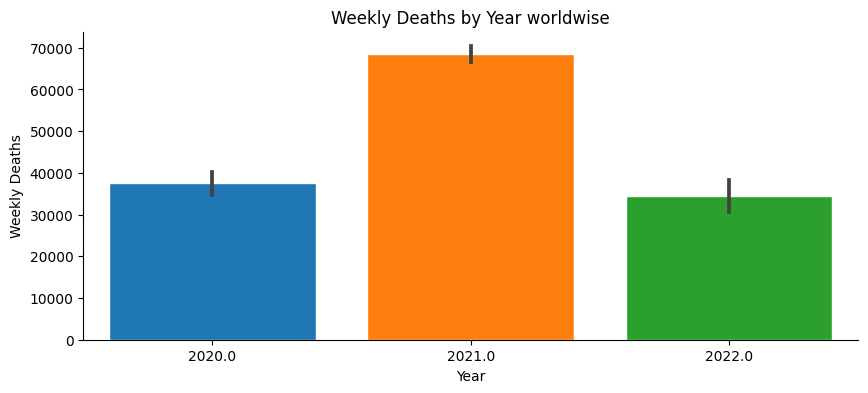

In [7]:
create_barplot("Weekly Deaths")

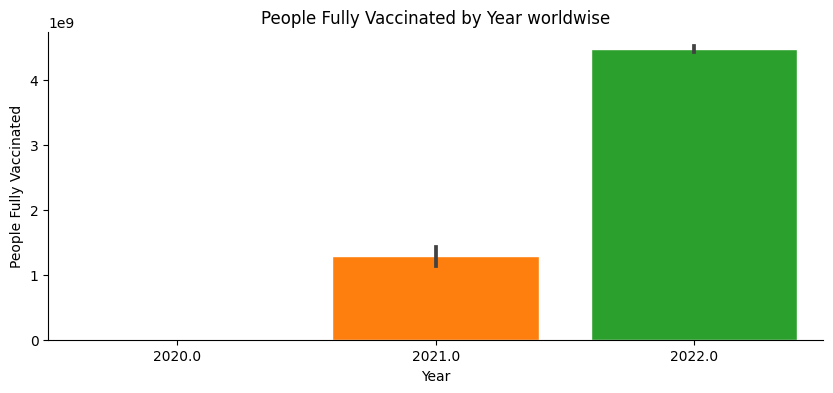

In [8]:
create_barplot("People Fully Vaccinated")

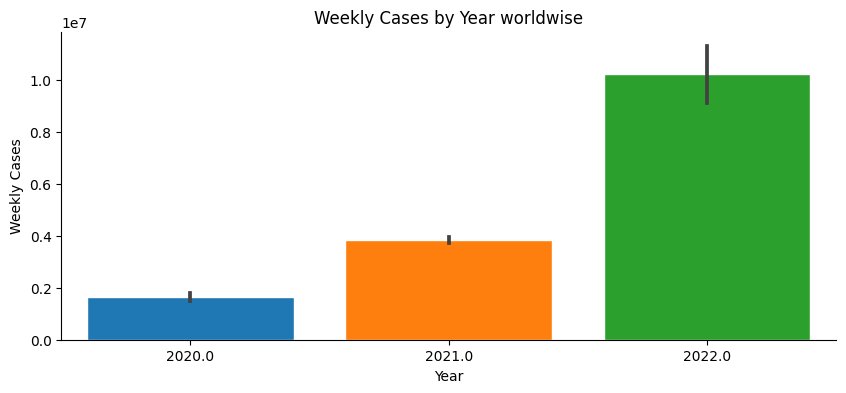

In [9]:
create_barplot("Weekly Cases")

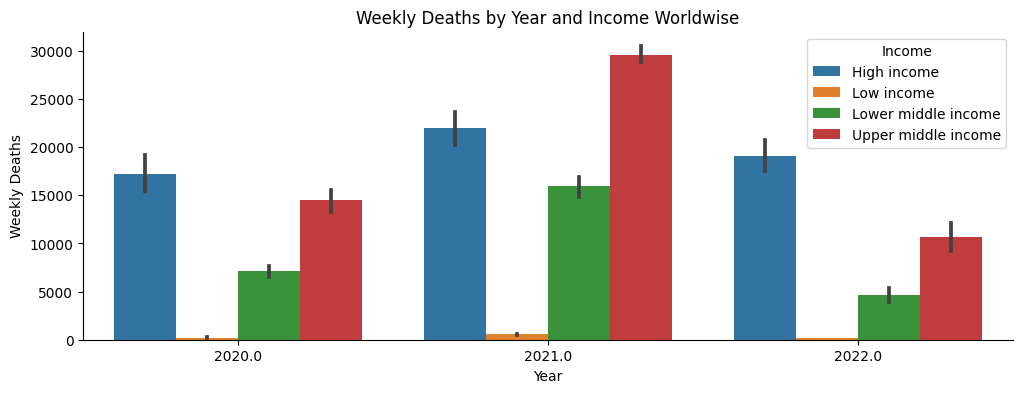

In [18]:
legend = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
df = df_train.copy()
df["Income"] = df_train["Income"].apply(lambda x: x if pd.isna(x) else legend[int(x-1)])
_, ax = plt.subplots(figsize=(12,4))
sns.barplot(data=df.dropna(subset=["Income"]), x="Year", y="Weekly Deaths", hue="Income")
sns.despine()
plt.title("Weekly Deaths by Year and Income Worldwise")
plt.show()

# Boxplot

In [11]:
def create_boxplot(y:str, x:str="Year") -> None:
    _, ax = plt.subplots(figsize=(10,4))
    sns.boxplot(data=df_train.loc[df_train["Location"]=="World"], x=x, y=y)
    sns.despine()
    ax.get_legend()
    plt.title(f"{y} by {x} Worldwise")
    plt.show()

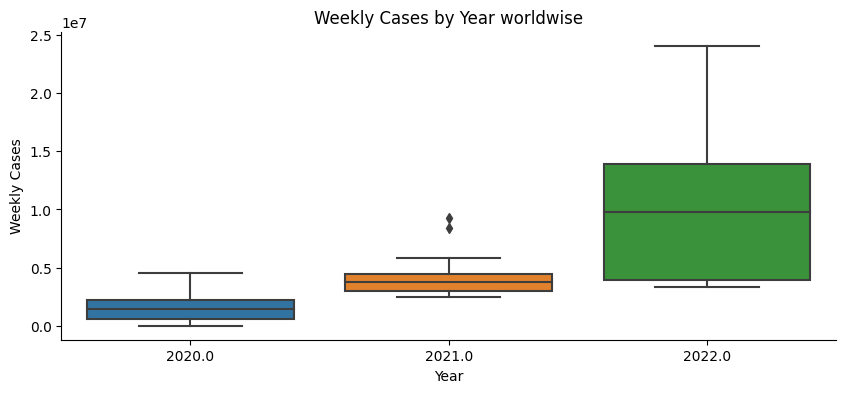

In [12]:
create_boxplot("Weekly Cases")

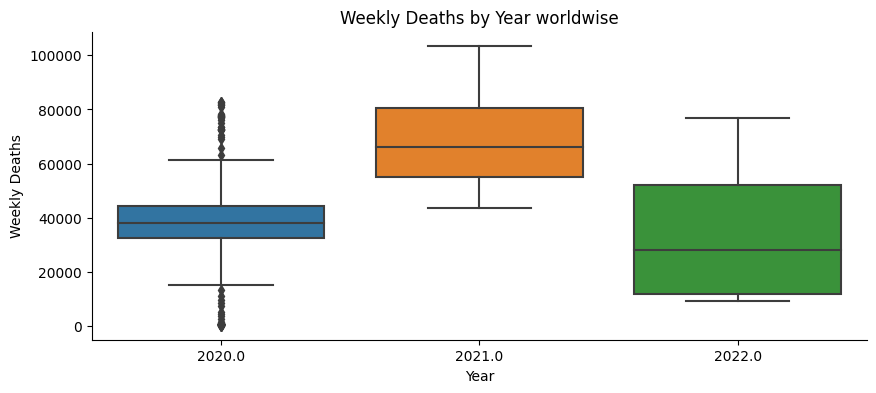

In [13]:
create_boxplot("Weekly Deaths")

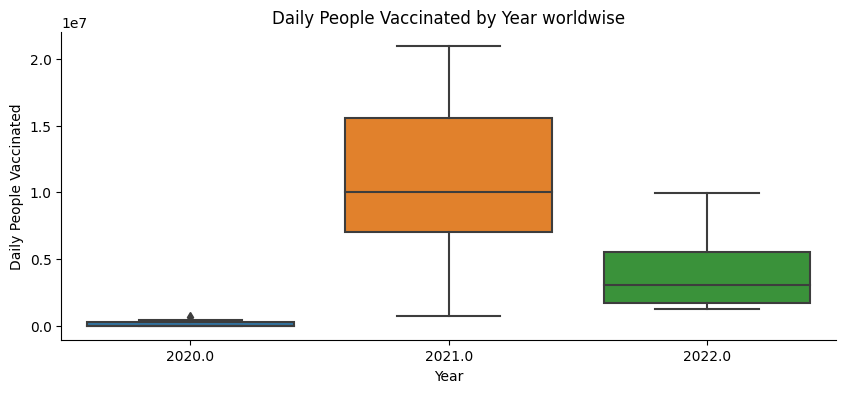

In [14]:
create_boxplot("Daily People Vaccinated")

# Plot

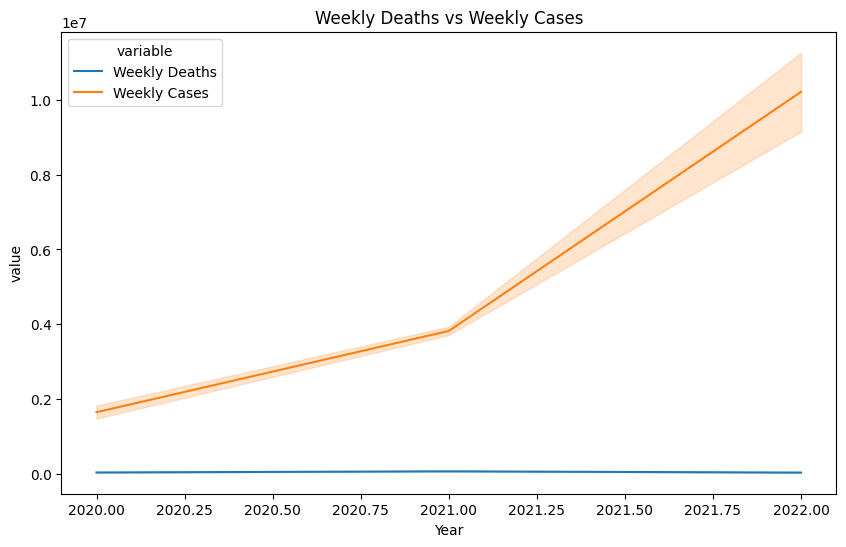

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=pd.melt(df_train.loc[df_train["Location"] == "World"][["Weekly Deaths", "Year", "Weekly Cases"]], ['Year']), x="Year", y='value', hue='variable')
plt.title("Weekly Deaths vs Weekly Cases")
plt.show()

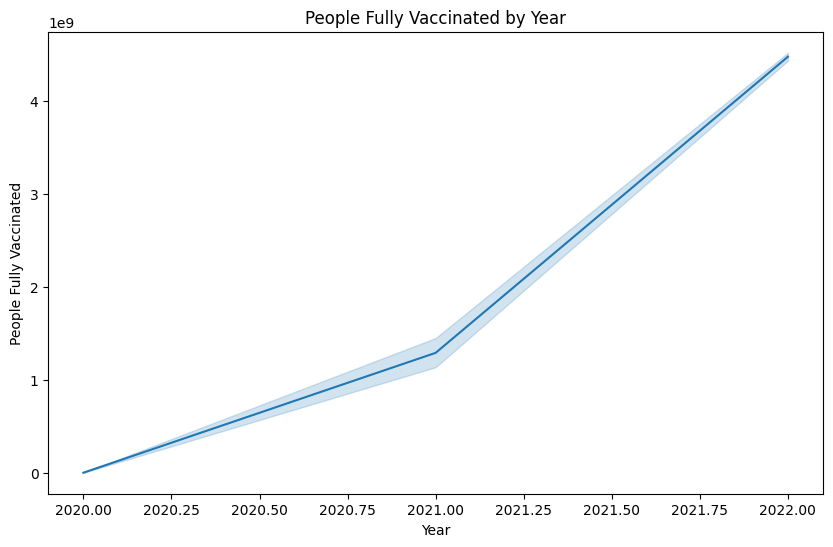

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_train.loc[df_train["Location"] == "World"], x="Year", y="People Fully Vaccinated")
plt.title("People Fully Vaccinated by Year")
plt.show()